<a href="https://colab.research.google.com/github/AjinkyaSar/financial-analytics-projects/blob/main/Fraud_Detection_%E2%80%93_Financial_Institutions_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [39]:
df = pd.read_csv('/content/Financial Institutions Fraud.csv', engine='python')
display(df.head())
display(df.shape) # Add shape display to confirm the number of rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


(1048575, 10)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [41]:
display(df.isnull().sum())

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [42]:
df.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [43]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


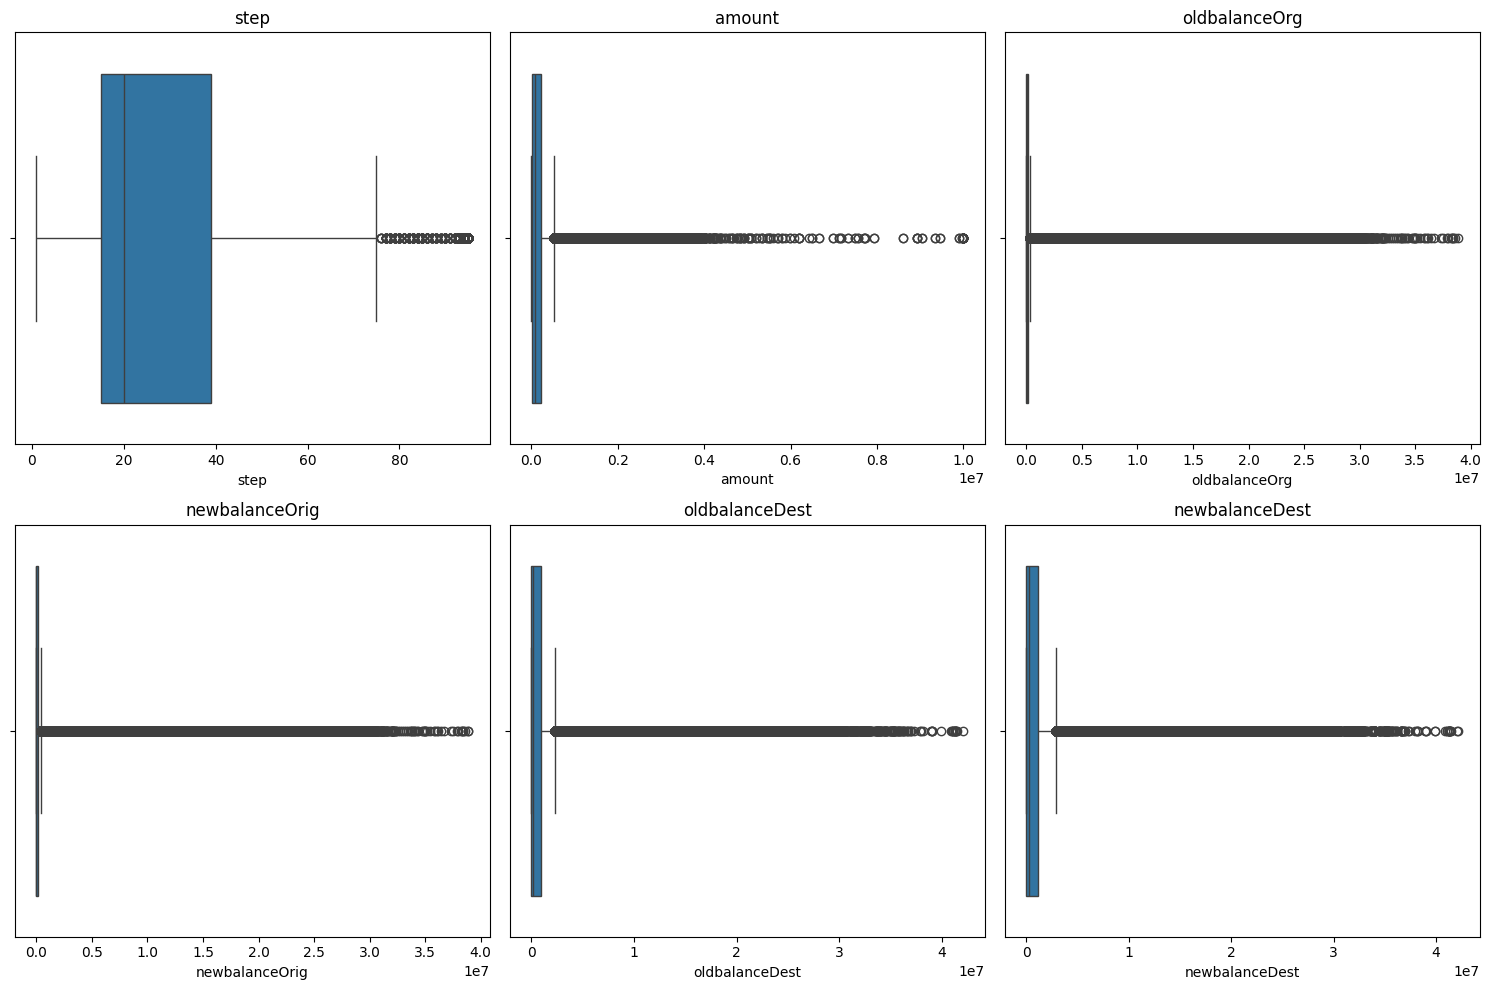

In [44]:
# Select numerical columns, excluding 'isFraud'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'isFraud' in numerical_cols:
    numerical_cols.remove('isFraud')

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [45]:
# Drop non-numeric and potentially irrelevant columns
df = df.drop(['nameDest', 'nameOrig'], axis=1)
display(df.head())

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'type' column
df['type'] = label_encoder.fit_transform(df['type'])

display(df.head())

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


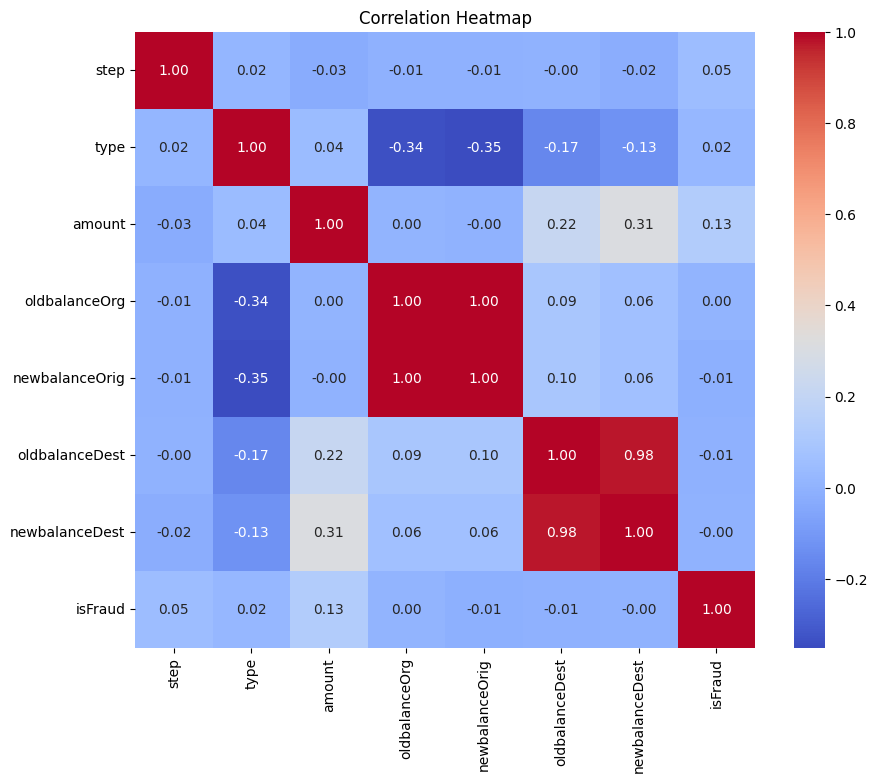

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled[:5]) # Display the first 5 rows of the scaled data

array([[-1.6620219 ,  0.9565757 , -0.56173807, -0.23685497, -0.24383202,
        -0.42588334, -0.46106169],
       [-1.6620219 ,  0.9565757 , -0.59184049, -0.28695576, -0.29067345,
        -0.42588334, -0.46106169],
       [-1.6620219 ,  1.70006662, -0.59819391, -0.29404519, -0.29711726,
        -0.42588334, -0.46106169],
       [-1.6620219 , -0.53040613, -0.59819391, -0.29404519, -0.29711726,
        -0.41666087, -0.46106169],
       [-1.6620219 ,  0.9565757 , -0.55483653, -0.28012309, -0.28718269,
        -0.42588334, -0.46106169]])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

array([[-0.57389963, -0.53040613,  0.41405885, -0.2941061 , -0.29711726,
        -0.28571505, -0.29768225],
       [-1.14996436,  0.9565757 , -0.58440562, -0.29186687, -0.29617972,
        -0.42588334, -0.46106169],
       [ 0.64223703, -0.53040613,  1.0581816 , -0.13160821, -0.28253063,
        -0.21218408, -0.07628738],
       [-0.18985648,  0.9565757 , -0.5477637 , -0.29379349, -0.29711726,
        -0.42588334, -0.46106169],
       [ 0.77025141,  0.9565757 , -0.543939  , -0.2941061 , -0.29711726,
        -0.42588334, -0.46106169]])

array([[ 0.77025141,  1.70006662,  1.57047109, -0.25840726, -0.29711726,
        -0.42588334, -0.22322722],
       [ 1.02628018, -1.27389705, -0.51916554,  3.23916656,  3.19326105,
         0.74498229,  0.64301427],
       [ 1.02628018, -1.27389705, -0.4986593 , -0.28718663, -0.28145553,
        -0.42588334, -0.46106169],
       [ 0.77025141,  0.9565757 , -0.56936449, -0.2941061 , -0.29711726,
        -0.42588334, -0.46106169],
       [ 0.57822983, -0.53040613,  0.58219509, -0.2941061 , -0.29711726,
         0.14487967,  0.2108891 ]])

,isFraud
408561,0
70143,0
708782,0
572694,0
774181,0


,isFraud
781974,0
937737,0
907828,0
784628,0
662460,0


In [53]:
import pandas as pd
import statsmodels.api as sm

# Define feature names (replace with your actual list if available)
feature_names = ['step', 'type', 'amount', 'oldbalanceDest', 'newbalanceDest', 'feature6', 'feature7']

# Convert arrays into DataFrames
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df  = pd.DataFrame(X_test,  columns=feature_names)

# y_train is already a Series, but ensure name is correct
y_train_df = pd.Series(y_train, name="isFraud")

# Drop any missing values (if needed)
train_data = pd.concat([X_train_df, y_train_df], axis=1).dropna()

# Split back into X and y
X_train_cleaned = train_data.drop('isFraud', axis=1)
y_train_cleaned = train_data['isFraud']

# Add constant (intercept term)
X_train_sm = sm.add_constant(X_train_cleaned)
X_test_sm = sm.add_constant(X_test_df)

# ✅ Logistic Regression (not OLS, since isFraud is binary)
logit_model = sm.Logit(y_train_cleaned, X_train_sm)
result = logit_model.fit()

print(result.summary())

# Predictions (probabilities)
y_pred_prob = result.predict(X_test_sm)

# Class labels (threshold 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

Optimization terminated successfully.
         Current function value: 0.004880
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:               671220
Model:                          Logit   Df Residuals:                   671212
Method:                           MLE   Df Model:                            7
Date:                Tue, 16 Sep 2025   Pseudo R-squ.:                0.001611
Time:                        03:58:40   Log-Likelihood:                -3275.5
converged:                       True   LL-Null:                       -3280.8
Covariance Type:            nonrobust   LLR p-value:                    0.1584
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.4687      0.051   -145.183      0.000      -7.570      -7.368
step            

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Convert predicted probabilities to class labels using a threshold of 0.5
y_pred_class = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("Recall:", recall_score(y_test, y_pred_class))
print("F1-score:", f1_score(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

Accuracy: 0.9989318837469899
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.00      0.00      0.00       224

    accuracy                           1.00    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [55]:
from sklearn.ensemble import IsolationForest

# Initialize and train the Isolation Forest model
# n_estimators is the number of trees in the forest
# contamination is the proportion of outliers in the data set. 'auto' lets the model decide.
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X) # Use the entire dataset X for training

# Predict anomalies (-1 for outliers, 1 for inliers)
# We use the original X data before splitting
y_pred_iso = model.predict(X)

# Add the anomaly scores and predictions to the original dataframe for analysis
df['anomaly_score'] = model.decision_function(X)
df['is_anomaly_iso'] = y_pred_iso

# Display the head of the dataframe with the new columns
display(df.head())

# Display the count of anomalies detected
print("Number of anomalies detected by Isolation Forest:", list(df['is_anomaly_iso']).count(-1))

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,anomaly_score,is_anomaly_iso
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0.077074,1
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0.095949,1
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0.057413,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0.086369,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0.096169,1


Number of anomalies detected by Isolation Forest: 146842


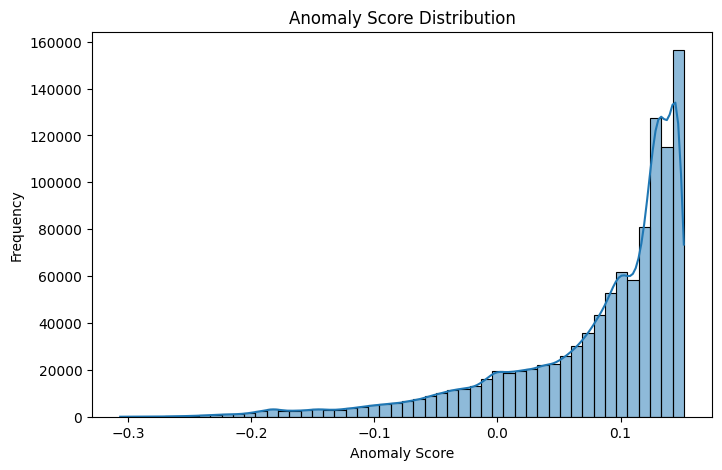

Train Score: 0.9535393271821281
Test Score: 0.9542665045418782
Original size: 1048575
Filtered size: 1027576


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming your dataframe is df
# Columns: [..., "anomaly_score", "is_anomaly_iso", "isFraud"]

# 1. Plot anomaly score distribution
plt.figure(figsize=(8,5))
sns.histplot(df['anomaly_score'], bins=50, kde=True)
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

# 2. Add anomaly score as a feature in your model
# Example: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Add anomaly features
X = df.drop(columns=["isFraud"])  # keep anomaly_score + is_anomaly_iso
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)

print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

# 3. Optional: Remove extreme anomalies (top 1-2% scores)
threshold = np.percentile(df['anomaly_score'], 98)  # keep 98% rows
df_filtered = df[df['anomaly_score'] < threshold]

print("Original size:", df.shape[0])
print("Filtered size:", df_filtered.shape[0])


In [57]:
import numpy as np

# Keep anomaly features as predictors
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

# Optional: Remove extreme anomalies (top 2% anomaly_score)
threshold = np.percentile(df['anomaly_score'], 98)
df_filtered = df[df['anomaly_score'] < threshold]

print("Original rows:", df.shape[0])
print("Filtered rows:", df_filtered.shape[0])

# Train/test split on filtered data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered.drop(columns=["isFraud"]),
    df_filtered["isFraud"],
    test_size=0.2,
    stratify=df_filtered["isFraud"],
    random_state=42
)

Original rows: 1048575
Filtered rows: 1027576


In [58]:
df = df_filtered.copy()

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# --- 1. Separate features (X) and target (y) ---
X = df.drop(['isFraud', 'anomaly_score', 'is_anomaly_iso'], axis=1)
y = df['isFraud']

print("Before SMOTE:")
print(y.value_counts())

# --- 2. Train-test split (important: apply SMOTE only on training set, not test set) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Apply SMOTE on training set ---
smote = SMOTE(random_state=42, sampling_strategy="auto")
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_test_res, y_test_res = smote.fit_resample(X_test, y_test)
print("\nAfter SMOTE (train and test):")
print(y_train_res.value_counts())
print(y_test_res.value_counts())


Before SMOTE:
isFraud
0    1026434
1       1142
Name: count, dtype: int64

After SMOTE (train and test):
isFraud
0    821146
1    821146
Name: count, dtype: int64
isFraud
0    205288
1    205288
Name: count, dtype: int64


In [60]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# ----------------------------
# 4. Add constant (Intercept)
# ----------------------------
X_train_res_const = sm.add_constant(X_train_res)
X_test_const = sm.add_constant(X_test)

# ----------------------------
# 5. Fit Logistic Regression
# ----------------------------
logit_model = sm.Logit(y_train_res, X_train_res_const)
result = logit_model.fit_regularized()

# ----------------------------
# 6. Model Summary
# ----------------------------
print(result.summary())

# ----------------------------
# 7. Predictions
# ----------------------------
y_pred_prob = result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

# ----------------------------
# 8. Evaluation
# ----------------------------
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.21453449691897974
            Iterations: 44
            Function evaluations: 98
            Gradient evaluations: 44


/usr/local/lib/python3.12/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1642292
Model:                          Logit   Df Residuals:                  1642284
Method:                           MLE   Df Model:                            7
Date:                Tue, 16 Sep 2025   Pseudo R-squ.:                  0.6905
Time:                        04:05:33   Log-Likelihood:            -3.5233e+05
converged:                       True   LL-Null:                   -1.1384e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4013      0.009   -156.259      0.000      -1.419      -1.384
step               0.0217      0.000    146.635      0.000       0.021       0.022
type               0.0406      0.003

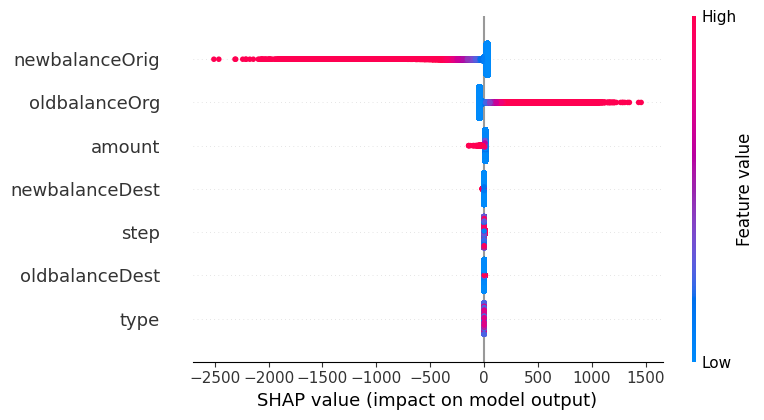

In [61]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------
# 1. Extract Coefficients and Intercept
# --------------------------------
# Get the coefficients and intercept from the statsmodels result object.
# The 'const' coefficient is the intercept.
coef = result.params.drop('const').values
intercept = result.params['const']

# --------------------------------
# 2. SHAP Explainer
# --------------------------------
# Create the explainer using the extracted values.
# The masker is the resampled training data without the 'const' column.
explainer = shap.LinearExplainer(
    (coef, intercept),
    masker=X_train_res_const.drop('const', axis=1)
)

# --------------------------------
# 3. Calculate SHAP values
# --------------------------------
# Calculate SHAP values for the test set.
# The data passed here also should not include the 'const' column.
shap_values = explainer.shap_values(X_test_const.drop('const', axis=1))

# --------------------------------
# 4. Create a pandas DataFrame for plotting
# --------------------------------
# The plotting data should match the data used to calculate SHAP values.
X_test_df = X_test_const.drop('const', axis=1)

# --------------------------------
# 5. Plot the SHAP summary plot (Dot Plot)
# --------------------------------
# This is the default plot type and will produce the figure you want.
shap.summary_plot(
    shap_values,
    features=X_test_df
)

In [62]:
# Drop 'newbalanceOrig' and 'oldbalanceOrg' columns
df = df.drop(['newbalanceOrig', 'oldbalanceOrg'], axis=1)

# Display the head of the dataframe to confirm the columns are dropped
display(df.head())

,step,type,amount,oldbalanceDest,newbalanceDest,isFraud,anomaly_score,is_anomaly_iso
0,1,3,9839.64,0.0,0.0,0,0.077074,1
1,1,3,1864.28,0.0,0.0,0,0.095949,1
2,1,4,181.00,0.0,0.0,1,0.057413,1
3,1,1,181.00,21182.0,0.0,1,0.086369,1
4,1,3,11668.14,0.0,0.0,0,0.096169,1


In [63]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# ----------------------------
# 1. Features & Target
# ----------------------------
X = df.drop(['isFraud', 'anomaly_score', 'is_anomaly_iso'], axis=1)
y = df['isFraud']

# ----------------------------
# 2. Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 3. SMOTE on training set
# ----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

# ----------------------------
# 4. Add constant (Intercept)
# ----------------------------
X_train_res_const = sm.add_constant(X_train_res)
X_test_const = sm.add_constant(X_test)

# ----------------------------
# 5. Fit Logistic Regression
# ----------------------------
logit_model = sm.Logit(y_train_res, X_train_res_const)
result = logit_model.fit()

# ----------------------------
# 6. Model Summary
# ----------------------------
print(result.summary())

# ----------------------------
# 7. Predictions
# ----------------------------
y_pred_prob = result.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

# ----------------------------
# 8. Evaluation
# ----------------------------
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Before SMOTE: {0: 821146, 1: 914}
After SMOTE: {0: 821146, 1: 821146}
Optimization terminated successfully.
         Current function value: 0.455530
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1642292
Model:                          Logit   Df Residuals:                  1642286
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Sep 2025   Pseudo R-squ.:                  0.3428
Time:                        04:06:15   Log-Likelihood:            -7.4811e+05
converged:                       True   LL-Null:                   -1.1384e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.9617     

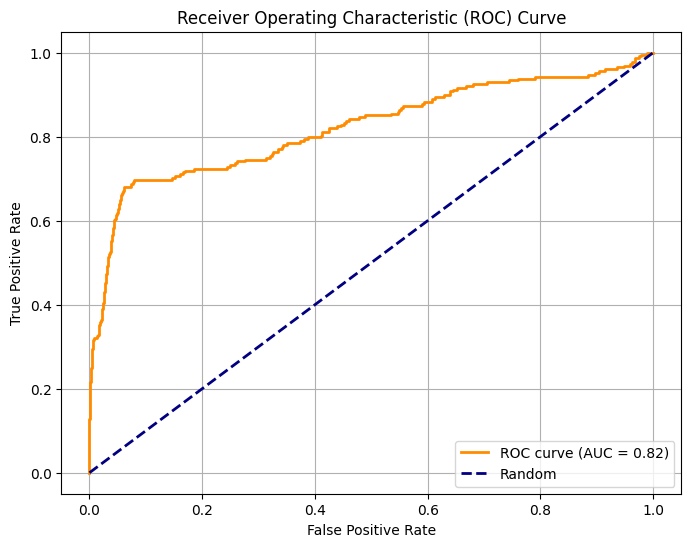

AUC Score: 0.82


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob are available from the previous logistic regression model evaluation

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Assuming X and y are already defined and preprocessed (including SMOTE)
# It is generally recommended to apply SMOTE within the cross-validation loop
# to avoid data leakage, but for simplicity and to follow the current notebook
# state, we will use the resampled data from the previous step.
# If you want to apply SMOTE correctly within CV, you would need to modify
# the loop to apply SMOTE separately to each fold's training data.

# Define the number of splits for cross-validation
n_splits = 5  # You can change this number

# Initialize Stratified K-Fold cross-validation
# StratifiedKFold ensures that the proportion of the target variable
# is the same in each fold as in the original dataset.
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Initialize the Logistic Regression model
# We use the scikit-learn implementation here as it integrates well with cross-validation.
# We set solver to 'liblinear' for smaller datasets and 'lbfgs' or 'newton-cg' for larger ones.
# Since we have a large dataset after SMOTE, 'lbfgs' is a good choice.
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42) # Increased max_iter for convergence

# Perform cross-validation
# We use the resampled data (X_train_res, y_train_res) for training and validation within the folds
# and the original test set (X_test, y_test) for final evaluation.
# Note: A more rigorous approach would apply SMOTE within the CV loop on the training folds.
print(f"Performing {n_splits}-fold cross-validation...")

# Combine resampled training and test data for cross-validation
X_res = pd.concat([X_train_res, X_test_res])
y_res = pd.concat([y_train_res, y_test_res])

# Drop the 'oldbalanceOrg' and 'newbalanceOrig' columns from X_res as they contain NaNs
X_res = X_res.drop(['oldbalanceOrg', 'newbalanceOrig'], axis=1)


for fold, (train_index, val_index) in enumerate(skf.split(X_res, y_res)):
    print(f"\nFold {fold+1}/{n_splits}")

    # Split data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_res.iloc[train_index], X_res.iloc[val_index]
    y_train_fold, y_val_fold = y_res.iloc[train_index], y_res.iloc[val_index]

    # Train the model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = model.predict(X_val_fold)
    y_val_pred_prob = model.predict_proba(X_val_fold)[:, 1] # Get probabilities for ROC AUC

    # Evaluate the model on the validation fold
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    roc_auc = roc_auc_score(y_val_fold, y_val_pred_prob)

    # Store the metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Print metrics for the current fold
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")

# Calculate and print the average metrics across all folds
print("\nAverage Metrics Across Folds:")
print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Average Precision: {np.mean(precision_scores):.4f}")
print(f"Average Recall: {np.mean(recall_scores):.4f}")
print(f"Average F1-score: {np.mean(f1_scores):.4f}")
print(f"Average ROC AUC: {np.mean(roc_auc_scores):.4f}")

Performing 5-fold cross-validation...

Fold 1/5
  Accuracy: 0.8063
  Precision: 0.8514
  Recall: 0.7421
  F1-score: 0.7930
  ROC AUC: 0.8566

Fold 2/5
  Accuracy: 0.8056
  Precision: 0.8511
  Recall: 0.7407
  F1-score: 0.7921
  ROC AUC: 0.8565

Fold 3/5
  Accuracy: 0.8046
  Precision: 0.8500
  Recall: 0.7396
  F1-score: 0.7910
  ROC AUC: 0.8557

Fold 4/5
  Accuracy: 0.8051
  Precision: 0.8510
  Recall: 0.7398
  F1-score: 0.7915
  ROC AUC: 0.8571

Fold 5/5
  Accuracy: 0.8052
  Precision: 0.8505
  Recall: 0.7405
  F1-score: 0.7917
  ROC AUC: 0.8564

Average Metrics Across Folds:
Average Accuracy: 0.8053
Average Precision: 0.8508
Average Recall: 0.7405
Average F1-score: 0.7919
Average ROC AUC: 0.8564


In [67]:
# Calculate and print the average, min, and max metrics across all folds
print("\nCross-Validation Metrics Range:")

print(f"Accuracy: {np.mean(accuracy_scores):.4f} "
      f"(min: {np.min(accuracy_scores):.4f}, max: {np.max(accuracy_scores):.4f})")

print(f"Precision: {np.mean(precision_scores):.4f} "
      f"(min: {np.min(precision_scores):.4f}, max: {np.max(precision_scores):.4f})")

print(f"Recall: {np.mean(recall_scores):.4f} "
      f"(min: {np.min(recall_scores):.4f}, max: {np.max(recall_scores):.4f})")

print(f"F1-score: {np.mean(f1_scores):.4f} "
      f"(min: {np.min(f1_scores):.4f}, max: {np.max(f1_scores):.4f})")

print(f"ROC AUC: {np.mean(roc_auc_scores):.4f} "
      f"(min: {np.min(roc_auc_scores):.4f}, max: {np.max(roc_auc_scores):.4f})")


Cross-Validation Metrics Range:
Accuracy: 0.8053 (min: 0.8046, max: 0.8063)
Precision: 0.8508 (min: 0.8500, max: 0.8514)
Recall: 0.7405 (min: 0.7396, max: 0.7421)
F1-score: 0.7919 (min: 0.7910, max: 0.7930)
ROC AUC: 0.8564 (min: 0.8557, max: 0.8571)
